In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class KNNClassifier:
    def __init__(self, k: int = 5) -> None:
        self.k = k

    def fit(self, x: pd.DataFrame, y: pd.Series) -> None:
        self.x_train = x.to_numpy(dtype=float)
        self.y_train = y.to_numpy()

    def euclidean_distance(self, p1: np.ndarray, p2: np.ndarray) -> float:
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def prediction_point(self, testPoint: np.ndarray) -> int:
        distance_vector = []
        for record in self.x_train:
            dist = self.euclidean_distance(testPoint, record)
            distance_vector.append(dist)

        k_indices = np.argsort(distance_vector)[:self.k]

        k_labels = self.y_train[k_indices]

        labels, counts = np.unique(k_labels, return_counts=True)
        return labels[np.argmax(counts)]

    def prediction_set(self, test_points: np.ndarray) -> np.ndarray:
        test_points = np.array(test_points, dtype=float)
        y_predicted = []
        for point in test_points:
            y_predicted.append(self.prediction_point(point))
        return np.array(y_predicted)

    def accuracy(self, y_true: np.ndarray, y_predicted: np.ndarray) -> float:
        return np.mean(y_true == y_predicted)


In [ ]:
diabetes_dataset = pd.read_csv('./data/diabetes.csv')

In [19]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
diabetes_dataset = diabetes_dataset.sample(frac=1).reset_index(drop=True)

In [22]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,130,96,0,0,22.6,0.268,21,0
1,7,142,60,33,190,28.8,0.687,61,0
2,3,129,64,29,115,26.4,0.219,28,1
3,3,158,64,13,387,31.2,0.295,24,0
4,3,141,0,0,0,30.0,0.761,27,1
...,...,...,...,...,...,...,...,...,...
763,0,113,80,16,0,31.0,0.874,21,0
764,2,106,64,35,119,30.5,1.400,34,0
765,9,170,74,31,0,44.0,0.403,43,1
766,2,105,75,0,0,23.3,0.560,53,0


In [23]:
x_data, y_data = diabetes_dataset.drop(columns=['Outcome']), diabetes_dataset['Outcome']

In [35]:
x_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,130,96,0,0,22.6,0.268,21
1,7,142,60,33,190,28.8,0.687,61
2,3,129,64,29,115,26.4,0.219,28
3,3,158,64,13,387,31.2,0.295,24
4,3,141,0,0,0,30.0,0.761,27
...,...,...,...,...,...,...,...,...
763,0,113,80,16,0,31.0,0.874,21
764,2,106,64,35,119,30.5,1.400,34
765,9,170,74,31,0,44.0,0.403,43
766,2,105,75,0,0,23.3,0.560,53


In [36]:
y_data

0      0
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    1
766    0
767    1
Name: Outcome, Length: 768, dtype: int64

In [42]:
split = 0.8
x_train, x_test = x_data[:int(split * len(x_data))], x_data[int(split * len(x_data)):]
y_train, y_test = y_data[:int(split * len(x_data))], y_data[int(split * len(x_data)):]

In [46]:
u = x_train.mean(axis = 0)
sigma = x_train.std(axis = 0)

x_train = (x_train - u) / sigma
x_test = (x_test - u) / sigma

In [47]:
clf = KNNClassifier(k = 3)
clf.fit(x_train, y_train)

In [48]:
y_predicted = clf.prediction_set(x_test)

In [49]:
clf.accuracy(y_test, y_predicted)

0.7337662337662337

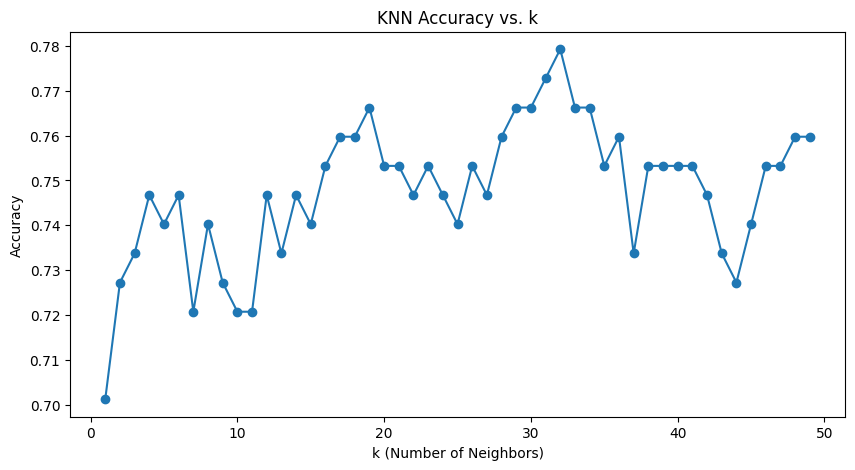

In [50]:
k_values = []
accuracies = []

for param in range(1, 50):
    clf = KNNClassifier(k=param)
    clf.fit(x_train, y_train)
    y_predicted = clf.prediction_set(x_test)
    acc = clf.accuracy(y_test, y_predicted)

    k_values.append(param)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()
